In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
from pyecharts.charts import Bar
from pyecharts import options as opts
%matplotlib inline
import os
os.chdir("C:\\Users\liuzhijie\Desktop\EDA")

数据分析主要分为两块内容：

*其一为对历史数据的分析，找出特别的异常的数据进行分析

*其二为对当下数据的分析，选取近四年的数据进行相关分析

In [3]:
pd.set_option('display.max_columns', 100)
df=pd.DataFrame(pd.read_csv('tmpfu_22znb.csv',encoding="gbk"))
df

C:\Users\liuzhijie\AppData\Local\Temp\ipykernel_17404\121847912.py:2: DtypeWarning: Columns (4,8,9,10,11,14,17,20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.DataFrame(pd.read_csv('tmpfu_22znb.csv',encoding="gbk"))


,incident_number,exposure_number,alarm_date,alarm_time,incident_type,incident_description,estimated_property_loss,estimated_content_loss,district,city_section,neighborhood,zip,property_use,property_description,street_number,street_prefix,street_name,street_suffix,street_type,address_2,xstreet_prefix,xstreet_name,xstreet_suffix,xstreet_type
0,22-0081417,0,2022/11/26,0:04:10,553,Public service,0,0,3,BO,Boston,2110,NaN,NaN,22,NaN,MILK,NaN,ST,NaN,NaN,NaN,NaN,NaN
1,22-0081419,0,2022/11/26,0:29:55,553,Public service,0,0,1,EB,East Boston,2128,NaN,NaN,10,NaN,GOVE,NaN,ST,: @HC-EAST BOSTON NEIGHBORHOOD HEALTH CE,NaN,NaN,NaN,NaN
2,22-0081422,0,2022/11/26,1:06:41,735,Alarm system sounded due to malfunction,0,0,9,JP,Jamaica Plain,2130,NaN,NaN,170,NaN,MORTON,NaN,ST,: #13-2557,NaN,NaN,NaN,NaN
3,22-0081425,0,2022/11/26,1:30:55,553,Public service,0,0,12,MT,Mattapan,2126,429,Multifamily dwelling,89,NaN,TENNIS,NaN,RD,NaN,NaN,NaN,NaN,NaN
4,22-0081429,0,2022/11/26,2:12:54,553,Public service,0,0,9,JP,Jamaica Plain,2130,NaN,NaN,761,NaN,CENTRE,NaN,ST,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426075,14-0000176,0,2014/1/1,22:53:16,743,"Smoke detector activation, no fire - unintenti...",0,0,4,NaN,NaN,2118,331,Hospital - medical or psychiatric,840.0,NaN,HARRISON,NaN,AV,NaN,NaN,NaN,NaN,NaN
426076,14-0000177,0,2014/1/1,22:58:22,743,"Smoke detector activation, no fire - unintenti...",0,0,1,NaN,NaN,2128,429,Multifamily dwelling,20.0,NaN,WALDEMAR,NaN,AV,KJB REALITY TRUST,NaN,NaN,NaN,NaN
426077,14-0000178,0,2014/1/1,22:59:08,611,Dispatched & cancelled en route,0,0,3,NaN,NaN,2108,NaN,NaN,17.0,NaN,COURT,NaN,ST,LOBBY,NaN,NaN,NaN,NaN
426078,14-0000180,0,2014/1/1,23:36:43,600,"Good intent call, Other",0,0,4,NaN,NaN,2115,900,"Outside or special property, Other",255.0,NaN,MASSACHUSETTS,NaN,AV,OUTSIDE,NaN,NaN,NaN,NaN


In [4]:
data=df.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426080 entries, 0 to 426079
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   incident_number          426080 non-null  object
 1   exposure_number          426080 non-null  int64 
 2   alarm_date               426080 non-null  object
 3   alarm_time               426080 non-null  object
 4   incident_type            426080 non-null  object
 5   incident_description     426080 non-null  object
 6   estimated_property_loss  426080 non-null  int64 
 7   estimated_content_loss   426080 non-null  int64 
 8   district                 426080 non-null  object
 9   city_section             401312 non-null  object
 10  neighborhood             401312 non-null  object
 11  zip                      426080 non-null  object
 12  property_use             403854 non-null  object
 13  property_description     403854 non-null  object
 14  street_number       

In [5]:
data_distinct_id = df[df['exposure_number'] == 0]  #去重

In [6]:
#去重后的数据集
data_distinct_id

,incident_number,exposure_number,alarm_date,alarm_time,incident_type,incident_description,estimated_property_loss,estimated_content_loss,district,city_section,neighborhood,zip,property_use,property_description,street_number,street_prefix,street_name,street_suffix,street_type,address_2,xstreet_prefix,xstreet_name,xstreet_suffix,xstreet_type
0,22-0081417,0,2022/11/26,0:04:10,553,Public service,0,0,3,BO,Boston,2110,NaN,NaN,22,NaN,MILK,NaN,ST,NaN,NaN,NaN,NaN,NaN
1,22-0081419,0,2022/11/26,0:29:55,553,Public service,0,0,1,EB,East Boston,2128,NaN,NaN,10,NaN,GOVE,NaN,ST,: @HC-EAST BOSTON NEIGHBORHOOD HEALTH CE,NaN,NaN,NaN,NaN
2,22-0081422,0,2022/11/26,1:06:41,735,Alarm system sounded due to malfunction,0,0,9,JP,Jamaica Plain,2130,NaN,NaN,170,NaN,MORTON,NaN,ST,: #13-2557,NaN,NaN,NaN,NaN
3,22-0081425,0,2022/11/26,1:30:55,553,Public service,0,0,12,MT,Mattapan,2126,429,Multifamily dwelling,89,NaN,TENNIS,NaN,RD,NaN,NaN,NaN,NaN,NaN
4,22-0081429,0,2022/11/26,2:12:54,553,Public service,0,0,9,JP,Jamaica Plain,2130,NaN,NaN,761,NaN,CENTRE,NaN,ST,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426075,14-0000176,0,2014/1/1,22:53:16,743,"Smoke detector activation, no fire - unintenti...",0,0,4,NaN,NaN,2118,331,Hospital - medical or psychiatric,840.0,NaN,HARRISON,NaN,AV,NaN,NaN,NaN,NaN,NaN
426076,14-0000177,0,2014/1/1,22:58:22,743,"Smoke detector activation, no fire - unintenti...",0,0,1,NaN,NaN,2128,429,Multifamily dwelling,20.0,NaN,WALDEMAR,NaN,AV,KJB REALITY TRUST,NaN,NaN,NaN,NaN
426077,14-0000178,0,2014/1/1,22:59:08,611,Dispatched & cancelled en route,0,0,3,NaN,NaN,2108,NaN,NaN,17.0,NaN,COURT,NaN,ST,LOBBY,NaN,NaN,NaN,NaN
426078,14-0000180,0,2014/1/1,23:36:43,600,"Good intent call, Other",0,0,4,NaN,NaN,2115,900,"Outside or special property, Other",255.0,NaN,MASSACHUSETTS,NaN,AV,OUTSIDE,NaN,NaN,NaN,NaN


In [7]:
data_distinct_id["alarm_date"]=pd.to_datetime(data_distinct_id["alarm_date"])
data_distinct_id["year"]=data_distinct_id.alarm_date.dt.year
data_distinct_id_year=data_distinct_id.year.value_counts().sort_index()
data_distinct_id_year

C:\Users\liuzhijie\AppData\Local\Temp\ipykernel_17404\499867678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_distinct_id["alarm_date"]=pd.to_datetime(data_distinct_id["alarm_date"])
C:\Users\liuzhijie\AppData\Local\Temp\ipykernel_17404\499867678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_distinct_id["year"]=data_distinct_id.alarm_date.dt.year


2014    41411
2015    46653
2016    47056
2017    47289
2018    50277
2019    49639
2020    44864
2021    49131
2022    49544
Name: year, dtype: int64

In [8]:
bar = ( Bar()
       .add_xaxis(data_distinct_id_year.index.to_list())
       .add_yaxis("",data_distinct_id_year.to_list())
       .set_global_opts(title_opts = opts.TitleOpts(title = "不同年份Boston火警出警次数")) )
bar.set_series_opts(label_opts=opts.LabelOpts(position = "top"))
bar.render_notebook()

In [9]:
#使用去重后的数据集
import pandas as pd
import numpy as np
import datetime
data_distinct_id['Time']= pd.to_datetime(data_distinct_id['alarm_date']) 
data_distinct_id['year'] = data_distinct_id['Time'].dt.strftime('%Y')
data_distinct_id['month'] = data_distinct_id['Time'].dt.strftime('%m')
data_distinct_id

C:\Users\liuzhijie\AppData\Local\Temp\ipykernel_17404\418531711.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_distinct_id['Time']= pd.to_datetime(data_distinct_id['alarm_date'])
C:\Users\liuzhijie\AppData\Local\Temp\ipykernel_17404\418531711.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_distinct_id['year'] = data_distinct_id['Time'].dt.strftime('%Y')
C:\Users\liuzhijie\AppData\Local\Temp\ipykernel_17404\418531711.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,incident_number,exposure_number,alarm_date,alarm_time,incident_type,incident_description,estimated_property_loss,estimated_content_loss,district,city_section,neighborhood,zip,property_use,property_description,street_number,street_prefix,street_name,street_suffix,street_type,address_2,xstreet_prefix,xstreet_name,xstreet_suffix,xstreet_type,year,Time,month
0,22-0081417,0,2022-11-26,0:04:10,553,Public service,0,0,3,BO,Boston,2110,NaN,NaN,22,NaN,MILK,NaN,ST,NaN,NaN,NaN,NaN,NaN,2022,2022-11-26,11
1,22-0081419,0,2022-11-26,0:29:55,553,Public service,0,0,1,EB,East Boston,2128,NaN,NaN,10,NaN,GOVE,NaN,ST,: @HC-EAST BOSTON NEIGHBORHOOD HEALTH CE,NaN,NaN,NaN,NaN,2022,2022-11-26,11
2,22-0081422,0,2022-11-26,1:06:41,735,Alarm system sounded due to malfunction,0,0,9,JP,Jamaica Plain,2130,NaN,NaN,170,NaN,MORTON,NaN,ST,: #13-2557,NaN,NaN,NaN,NaN,2022,2022-11-26,11
3,22-0081425,0,2022-11-26,1:30:55,553,Public service,0,0,12,MT,Mattapan,2126,429,Multifamily dwelling,89,NaN,TENNIS,NaN,RD,NaN,NaN,NaN,NaN,NaN,2022,2022-11-26,11
4,22-0081429,0,2022-11-26,2:12:54,553,Public service,0,0,9,JP,Jamaica Plain,2130,NaN,NaN,761,NaN,CENTRE,NaN,ST,NaN,NaN,NaN,NaN,NaN,2022,2022-11-26,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426075,14-0000176,0,2014-01-01,22:53:16,743,"Smoke detector activation, no fire - unintenti...",0,0,4,NaN,NaN,2118,331,Hospital - medical or psychiatric,840.0,NaN,HARRISON,NaN,AV,NaN,NaN,NaN,NaN,NaN,2014,2014-01-01,01
426076,14-0000177,0,2014-01-01,22:58:22,743,"Smoke detector activation, no fire - unintenti...",0,0,1,NaN,NaN,2128,429,Multifamily dwelling,20.0,NaN,WALDEMAR,NaN,AV,KJB REALITY TRUST,NaN,NaN,NaN,NaN,2014,2014-01-01,01
426077,14-0000178,0,2014-01-01,22:59:08,611,Dispatched & cancelled en route,0,0,3,NaN,NaN,2108,NaN,NaN,17.0,NaN,COURT,NaN,ST,LOBBY,NaN,NaN,NaN,NaN,2014,2014-01-01,01
426078,14-0000180,0,2014-01-01,23:36:43,600,"Good intent call, Other",0,0,4,NaN,NaN,2115,900,"Outside or special property, Other",255.0,NaN,MASSACHUSETTS,NaN,AV,OUTSIDE,NaN,NaN,NaN,NaN,2014,2014-01-01,01


In [10]:
data_distinct_id["year"]=data_distinct_id.alarm_date.dt.year
df["year"]=data_distinct_id["year"]

C:\Users\liuzhijie\AppData\Local\Temp\ipykernel_17404\3588223331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_distinct_id["year"]=data_distinct_id.alarm_date.dt.year


In [11]:
#计算财产损失，使用去重前的数据
df["estimated_loss"]=df["estimated_property_loss"]+df["estimated_content_loss"]
estimated_loss=df.groupby(["year"])["estimated_loss"].sum()
estimated_loss

year
2014.0    38612307
2015.0    28898880
2016.0    47917402
2017.0    74747026
2018.0    35864509
2019.0    51413951
2020.0    34928522
2021.0    38699338
2022.0    38690759
Name: estimated_loss, dtype: int64

In [12]:
bar = ( Bar()
       .add_xaxis(estimated_loss.index.to_list())
       .add_yaxis("", estimated_loss.to_list())
       .set_global_opts(title_opts = opts.TitleOpts(title = "不同年份的财产损失总额")) )
bar.set_series_opts(label_opts=opts.LabelOpts(position = "top"))
bar.render_notebook()

对于2017年的损失尤为严重，基于此对其分析  结合2016年的数据找出损失这么大的原因

# 对2017年进行相关分析

In [13]:
data_2017 = data_distinct_id[pd.to_datetime(data_distinct_id['alarm_date']).dt.year == 2017]
data_2017['alarm_date'] = pd.to_datetime(data_2017['alarm_date'])
(data_2017['alarm_date'].max() - data_2017['alarm_date'].min()).days

C:\Users\liuzhijie\AppData\Local\Temp\ipykernel_17404\2021336834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2017['alarm_date'] = pd.to_datetime(data_2017['alarm_date'])


364

In [14]:
#Boston火警出警次数——基于不同年份下的不同月份
bar = Bar()
bar.add_xaxis([1,2,3,4,5,6,7,8,9,10,11,12])
for i in range(2014,2023):
    x = data_distinct_id[pd.to_datetime(data_distinct_id['alarm_date']).dt.year == i]
    x['month'] = pd.to_datetime(x['alarm_date']).dt.month
    y = x['month'].value_counts().sort_index()
    bar.add_yaxis("{}年".format(i), y.to_list())
bar.set_global_opts(title_opts=opts.TitleOpts(subtitle = "2014-2022"),toolbox_opts = opts.ToolboxOpts(is_show = True))
bar.set_series_opts(label_opts=opts.LabelOpts(position = "top"))
bar.render_notebook()

C:\Users\liuzhijie\AppData\Local\Temp\ipykernel_17404\933435298.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['month'] = pd.to_datetime(x['alarm_date']).dt.month
C:\Users\liuzhijie\AppData\Local\Temp\ipykernel_17404\933435298.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['month'] = pd.to_datetime(x['alarm_date']).dt.month
C:\Users\liuzhijie\AppData\Local\Temp\ipykernel_17404\933435298.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

这幅图展示的是不同年份的不同月份下Boston的火警报警次数。

从整体上看，每一年的报警次数中，每年7-10月份的报警次数最多，3-4月份最小；结合实际发现夏季温度高且降水少极易引发火灾，3-4月份降水较多难以引发火灾。

从部分来看，近几年的7-10月份与3-4月份的报警次数的差值比以前更大，有可能是夏天的温度更高更易引发火灾，这既有可能是全球性气候变暖有影响，又有较大可能受到政府影响，因为气候政策一直是美国总统选举的举措，在2017年特朗普就职后，他主张振兴传统能源业以及推动实现能源独立，这会影响当地的气候进而影响火灾发生频次。

In [22]:
data_2017 = data_distinct_id[pd.to_datetime(data_distinct_id['alarm_date']).dt.year == 2017]
data_2017['month'] = pd.to_datetime(data_2017['alarm_date']).dt.month
data_vis_var = data_2017['month'].value_counts().sort_index()
data_vis_var

C:\Users\liuzhijie\AppData\Local\Temp\ipykernel_17404\2951817273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2017['month'] = pd.to_datetime(data_2017['alarm_date']).dt.month


1     3525
2     3283
3     3995
4     3667
5     3826
6     4113
7     3976
8     4454
9     4271
10    4419
11    3805
12    3955
Name: month, dtype: int64

In [23]:
bar = ( Bar()
       .add_xaxis(data_vis_var.index.to_list())
       .add_yaxis("", data_vis_var.to_list())
       .set_global_opts(title_opts = opts.TitleOpts(title = "2017年不同月份的Boston火警出警次数")) )
bar.set_series_opts(label_opts=opts.LabelOpts(position = "top"))
bar.render_notebook()

In [24]:
#2017年各地区的报警次数玫瑰图分析
from pyecharts import options as opts
from pyecharts.charts import Page, Pie
data1 = neighb_counts_2017["2017年"]
labels = neighb_counts_2017.index.to_list()
c = Pie()
c.add("",[list(z) for z in zip(labels, data1)],radius=["35%", "70%"],rosetype='radius')
c.set_global_opts(title_opts=opts.TitleOpts(title=""))
c.render_notebook()

In [25]:
#2017年与2016年各地区报警次数变动情况
neighb_counts_2017=pd.DataFrame(data_distinct_id[pd.to_datetime(data_distinct_id['alarm_date']).dt.year == 2017]['neighborhood'].value_counts())
neighb_counts_2016=pd.DataFrame(data_distinct_id[pd.to_datetime(data_distinct_id['alarm_date']).dt.year == 2016]['neighborhood'].value_counts())
neighb_counts_2017["2016年"]=neighb_counts_2016["neighborhood"]
neighb_counts_2017["变动率"]=(neighb_counts_2017["neighborhood"]-neighb_counts_2016["neighborhood"])/neighb_counts_2016["neighborhood"]
neighb_counts_2017.rename(columns={"neighborhood":'2017年'},inplace=True) 
neighb_counts_2017

,2017年,2016年,变动率
Boston,13502,13616,-0.008373
Dorchester,7981,8318,-0.040515
Roxbury,6636,6330,0.048341
Allston-Brighton,3934,3728,0.055258
South Boston,2929,2718,0.077631
Jamaica Plain,2751,2797,-0.016446
East Boston,1882,1897,-0.007907
Hyde Park,1474,1623,-0.091805
Mattapan,1401,1416,-0.010593
West Roxbury,1394,1289,0.081458


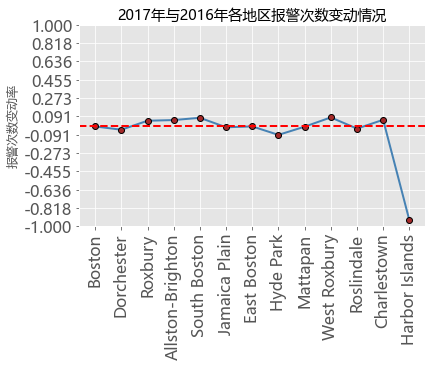

In [26]:
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
from pylab import xticks,yticks,np
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False
x=neighb_counts_2017["变动率"]
y=neighb_counts_2017.index.to_list()
plt.plot(y, 
         x,
         linestyle = '-', 
         linewidth = 2, 
         color = 'steelblue', 
         marker = 'o', 
         markersize = 6, 
         markeredgecolor='black', 
         markerfacecolor='brown', 
         )
plt.axhline(y=0.0, c='r', ls='--', lw=2)
plt.xticks(fontsize=16, )  
plt.yticks(fontsize=16, ) 
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.15, right=0.95)
pl.xticks(rotation=90)
yticks(np.linspace(-1,1,12,endpoint=True))
plt.ylabel('地区')
plt.ylabel('报警次数变动率')
plt.title('2017年与2016年各地区报警次数变动情况')
plt.show()

2017年与2016年相比各地区的报警次数基本上处于稳定状态，但是Harbor Islands的影响比较大。
后究其原因发现此地区的数据很少，2016年有16次而2017年仅有1次，数据量小所以对变动极其敏感，因此各地区总体上2016年与2017年报警次数相对稳定。

In [27]:
#使用去重前的数据
x=pd.DataFrame(df[pd.to_datetime(df['alarm_date']).dt.year == 2017])
y=pd.DataFrame(df[pd.to_datetime(df['alarm_date']).dt.year == 2016])
neighb_property_2017=pd.DataFrame(x.groupby(["neighborhood"])["estimated_loss"].sum().sort_index())
neighb_property_2016=pd.DataFrame(y.groupby(["neighborhood"])["estimated_loss"].sum().sort_index())
neighb_property_2017["2016年"]=neighb_property_2016["estimated_loss"]
neighb_property_2017["财产损失变动率"]=(neighb_property_2017["estimated_loss"]-neighb_property_2016["estimated_loss"])/neighb_property_2016["estimated_loss"]
neighb_property_2017.rename(columns={"estimated_loss":'2017年'},inplace=True)
neighb_property_2017_new=neighb_property_2017.fillna(value=0)
neighb_property_2017_new

,2017年,2016年,财产损失变动率
neighborhood,,,
Allston-Brighton,779665,4534773,-0.828070
Boston,3939840,9915807,-0.602671
Charlestown,555560,5534359,-0.899616
Dorchester,54713565,6891461,6.939327
East Boston,3403400,2843682,0.196829
Harbor Islands,0,0,0.000000
Hyde Park,2535864,5223634,-0.514540
Jamaica Plain,596234,1622332,-0.632483
Mattapan,1633890,2547072,-0.358522


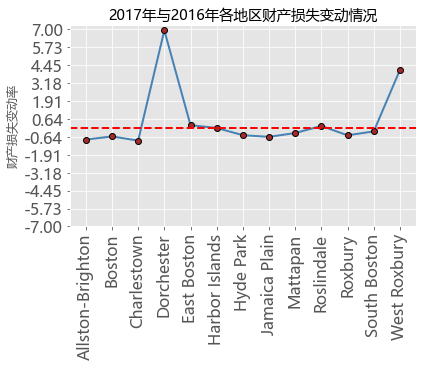

In [28]:
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
from pylab import xticks,yticks,np
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False
x=neighb_property_2017_new["财产损失变动率"]
y=neighb_property_2017_new.index.to_list()
plt.plot(y, 
         x,
         linestyle = '-', 
         linewidth = 2, 
         color = 'steelblue', 
         marker = 'o', 
         markersize = 6, 
         markeredgecolor='black', 
         markerfacecolor='brown', 
         )
plt.axhline(y=0.0, c='r', ls='--', lw=2)
plt.xticks(fontsize=16, )  
plt.yticks(fontsize=16, ) 
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.15, right=0.95)
pl.xticks(rotation=90)
yticks(np.linspace(-7,7,12,endpoint=True))
plt.ylabel('地区')
plt.ylabel('财产损失变动率')
plt.title('2017年与2016年各地区财产损失变动情况')
plt.show()

由图可知，2017年发生火灾带来财产损失尤其得多，与2016年相比是因为这一年内Dorchester地区财产损失得多，其他地区都相对稳定

以下探究2017年Dorchester地区为什么财产损失这么多？（主要从报警次数，火灾类型，火灾发生地等角度切入分析并解释原因）

In [29]:
inc_type = pd.read_excel('incident-type-code-list.xlsx').iloc[:,[2,4]]
pro_type= pd.read_excel('property-use-code-list.xlsx').iloc[:,[2,4]]

In [30]:
inc_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   code          188 non-null    object
 1   descript_inc  188 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [31]:
pro_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   code          154 non-null    object
 1   descript_pos  154 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [32]:
#使用去重前的2017年Dorchester数据
df["estimated_loss"]=df["estimated_property_loss"]+df["estimated_content_loss"]
inc_type['code'] = inc_type['code'].astype(str)
pro_type['code'] = pro_type['code'].astype(str)
df_2017 = df[pd.to_datetime(df['alarm_date']).dt.year == 2017]
df_2017_Dor_med1=df_2017.loc[df_2017["neighborhood"]=="Dorchester"]
df_2017_Dor_med2=pd.merge(df_2017_Dor_med1,inc_type,left_on = 'incident_type',right_on = 'code',how = 'left')
df_2017_Dor_med3=pd.merge(df_2017_Dor_med2,pro_type,left_on = 'property_use',right_on = 'code',how = 'left')
df_2017_Dor=df_2017_Dor_med3.fillna(value=0)

In [33]:
#使用去重后的2017年Dorchester数据
data_2017 = data_distinct_id[pd.to_datetime(data_distinct_id['alarm_date']).dt.year == 2017]
data_2017_Dor_med1=data_2017.loc[data_2017["neighborhood"]=="Dorchester"]
data_2017_Dor_med2=pd.merge(data_2017_Dor_med1,inc_type,left_on = 'incident_type',right_on = 'code',how = 'left')
data_2017_Dor_med3=pd.merge(data_2017_Dor_med2,pro_type,left_on = 'property_use',right_on = 'code',how = 'left')
data_2017_Dor=data_2017_Dor_med3.fillna(value=0)

In [34]:
#使用去重前的2016年Dorchester数据
df_2016 = df[pd.to_datetime(df['alarm_date']).dt.year == 2016]
df_2016_Dor_med1=df_2016.loc[df_2016["neighborhood"]=="Dorchester"]
df_2016_Dor_med2=pd.merge(df_2016_Dor_med1,inc_type,left_on = 'incident_type',right_on = 'code',how = 'left')
df_2016_Dor_med3=pd.merge(df_2016_Dor_med2,pro_type,left_on = 'property_use',right_on = 'code',how = 'left')
df_2016_Dor=df_2016_Dor_med3.fillna(value=0)

In [35]:
#使用去重后的2016年Dorchester数据
data_2016 = data_distinct_id[pd.to_datetime(data_distinct_id['alarm_date']).dt.year == 2016]
data_2016_Dor_med1=data_2016.loc[data_2016["neighborhood"]=="Dorchester"]
data_2016_Dor_med2=pd.merge(data_2016_Dor_med1,inc_type,left_on = 'incident_type',right_on = 'code',how = 'left')
data_2016_Dor_med3=pd.merge(data_2016_Dor_med2,pro_type,left_on = 'property_use',right_on = 'code',how = 'left')
data_2016_Dor=data_2016_Dor_med3.fillna(value=0)

In [36]:
df_2017_Dor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7981 entries, 0 to 7980
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   incident_number          7981 non-null   object 
 1   exposure_number          7981 non-null   int64  
 2   alarm_date               7981 non-null   object 
 3   alarm_time               7981 non-null   object 
 4   incident_type            7981 non-null   object 
 5   incident_description     7981 non-null   object 
 6   estimated_property_loss  7981 non-null   int64  
 7   estimated_content_loss   7981 non-null   int64  
 8   district                 7981 non-null   object 
 9   city_section             7981 non-null   object 
 10  neighborhood             7981 non-null   object 
 11  zip                      7981 non-null   object 
 12  property_use             7981 non-null   object 
 13  property_description     7981 non-null   object 
 14  street_number           

In [37]:
data_2016_Dor_inc=data_2016_Dor['descript_inc'].value_counts().head(5)
data_2017_Dor_inc=data_2017_Dor['descript_inc'].value_counts().head(5)

In [38]:
c.add("", [list(z) for z in zip(data_2017_Dor_inc.index.to_list(),data_2017_Dor_inc.to_list())])
from pyecharts import options as opts
from pyecharts.charts import Bar, Grid, Line,Scatter
A = data_2017_Dor_inc.index.to_list()
CA = data_2017_Dor_inc.to_list()
CB = data_2016_Dor_inc.to_list()
bar = Bar()
bar.add_xaxis(A)
bar.add_yaxis("2017年",CA)
bar.add_yaxis("2016年",CB)
bar.set_global_opts(title_opts=opts.TitleOpts(title="16-17年火灾类型Top5"))
line=Line()
line.add_xaxis(A)
line.add_yaxis("2017年", CA)
line.add_yaxis("2016年", CB)
line.set_global_opts(title_opts=opts.TitleOpts(pos_top="48%"),
legend_opts=opts.LegendOpts(pos_top="48%"))
grid = Grid()
grid.add(bar, grid_opts=opts.GridOpts(pos_bottom="60%"))
grid.add(line, grid_opts=opts.GridOpts(pos_top="60%"))
grid.render_notebook()

比较了2016年与2017年火灾类型的差异，发现这两年发生火灾的类型Top5相同，但2017年在最主要的火灾类型上发生频次有所减少,因此可以猜测2017年的损失这么大很有可能是意外事故。

In [39]:
data_2016_Dor_pos=data_2016_Dor['descript_pos'].value_counts().drop(labels=0).head(10)
data_2017_Dor_pos=data_2017_Dor['descript_pos'].value_counts().drop(labels=0).head(10)

In [40]:
bar = Bar()
bar.add_xaxis(data_2017_Dor_pos.index.to_list())
bar.add_yaxis("2017年", data_2017_Dor_pos.to_list())
bar.add_yaxis("2016年", data_2016_Dor_pos.to_list())
bar.set_global_opts(title_opts=opts.TitleOpts(title="16-17年火灾发生场所Top10"),toolbox_opts = opts.ToolboxOpts(is_show = True))
bar.set_series_opts(label_opts=opts.LabelOpts(position = "right"))
bar.reversal_axis()
bar.render_notebook()

In [41]:
df_2017_Dor_inc_med1=pd.DataFrame(df_2017_Dor.groupby(["descript_inc"])["estimated_loss"].sum())
df_2017_Dor_inc=df_2017_Dor_inc_med1.sort_values(by=["estimated_loss"], ascending=False)
df_2016_Dor_inc=pd.DataFrame(df_2016_Dor.groupby(["descript_inc"])["estimated_loss"].sum())
df_2016_Dor_inc_med1=df_2016_Dor_inc.sort_values(by=["estimated_loss"], ascending=False)
df_2017_Dor_inc["2016年"]=df_2016_Dor_inc_med1["estimated_loss"]
df_2017_Dor_inc["变动量"]=(df_2017_Dor_inc["estimated_loss"]-df_2016_Dor_inc_med1["estimated_loss"])
df_2017_Dor_inc.rename(columns={"estimated_loss":'2017年'},inplace=True) 
df_2017_Dor_inc_new=df_2017_Dor_inc.sort_values(by='变动量', ascending=False)
df_2017_Dor_inc_new.head(5)

,2017年,2016年,变动量
descript_inc,,,
建筑火灾,54015650,6317825.0,47697825.0
乘用车火灾,471100,353700.0,117400.0
越野车或重型设备起火,15000,2.0,14998.0
电弧、短路电气设备,2000,0.0,2000.0
室外垃圾、垃圾或废火,3124,1444.0,1680.0


In [42]:
df_2017_Dor_inc_med1=pd.DataFrame(df_2017_Dor.groupby(["descript_pos"])["estimated_loss"].sum())
df_2017_Dor_inc=df_2017_Dor_inc_med1.sort_values(by=["estimated_loss"], ascending=False).drop(labels=0)
df_2016_Dor_inc=pd.DataFrame(df_2016_Dor.groupby(["descript_pos"])["estimated_loss"].sum())
df_2016_Dor_inc_med1=df_2016_Dor_inc.sort_values(by=["estimated_loss"], ascending=False).drop(labels=0)
df_2017_Dor_inc["2016年"]=df_2016_Dor_inc_med1["estimated_loss"]
df_2017_Dor_inc["变动量"]=(df_2017_Dor_inc["estimated_loss"]-df_2016_Dor_inc_med1["estimated_loss"])
df_2017_Dor_inc.rename(columns={"estimated_loss":'2017年'},inplace=True) 
df_2017_Dor_inc_new1=df_2017_Dor_inc.sort_values(by='变动量', ascending=False)
df_2017_Dor_inc_new=df_2017_Dor_inc_new1.head(5)
df_2017_Dor_inc_new

,2017年,2016年,变动量
descript_pos,,,
多户住宅,50147794,4675336.0,45472458.0
商业，商业，其他,1002020,412.0,1001608.0
洗衣、干洗,1005000,26100.0,978900.0
制造、加工,200000,0.0,200000.0
小学，包括幼儿园,200270,3000.0,197270.0


In [43]:
num = df_2017_Dor_inc_new["变动量"]
wd = df_2017_Dor_inc_new.index.to_list()
from pyecharts import options as opts
from pyecharts.charts import Page, Pie
c = Pie()
c.add("",[list(z) for z in zip(wd, num)],radius = ["60%", "75%"])   
c.set_global_opts( title_opts=opts.TitleOpts(title="财产损失变动(增加)情况"),legend_opts=opts.LegendOpts( orient="vertical", pos_top="40%", pos_left="48%" ))
c .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
c.render_notebook()

从上述可视化可得，2017年之所以财产损失如此之大，最主要的原因出现在居民多户住宅的火灾，与2016年相比损失增加了数千万元，在居民住宅区产生如此大的损失，可能认为是在半夜发生且发生很长的时间。

相关的部门应该在夜间多重视居民住宅区以及居民应该提高火灾防范意识，可以安装烟雾报警器等等

In [44]:
data_2017_Dor['Time']= pd.to_datetime(data_2017_Dor['alarm_time']) 
data_2017_Dor['hour'] =data_2017_Dor['Time'].dt.strftime('%H')
df_2017_Dor['Time']= pd.to_datetime(df_2017_Dor['alarm_time']) 
df_2017_Dor['hour'] =df_2017_Dor['Time'].dt.strftime('%H')
data_distinct_id['Time']= pd.to_datetime(data_distinct_id['alarm_time']) 
data_distinct_id['hour'] =data_distinct_id['Time'].dt.strftime('%H')
data_2017_Dor_hour=data_distinct_id["hour"].value_counts().sort_index()
data_distinct_id_hour=pd.DataFrame(data_distinct_id.groupby(["hour"])["hour"].value_counts())

C:\Users\liuzhijie\AppData\Local\Temp\ipykernel_17404\3828069512.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_distinct_id['Time']= pd.to_datetime(data_distinct_id['alarm_time'])
C:\Users\liuzhijie\AppData\Local\Temp\ipykernel_17404\3828069512.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_distinct_id['hour'] =data_distinct_id['Time'].dt.strftime('%H')


In [45]:
from pyecharts import options as opts
from pyecharts.charts import Scatter
week = data_2017_Dor_hour.index.to_list()
c = Scatter()
c.add_xaxis(week)
c.add_yaxis("时间(h)",data_2017_Dor_hour.to_list())
c.set_global_opts(title_opts=opts.TitleOpts(title="2017年Dorchester地区不同时间段火灾报警次数"))
c.render_notebook()

In [46]:
df_2017_Dor_hour=pd.DataFrame(df_2017_Dor.groupby(["hour"])["estimated_loss"].sum())
from pyecharts import options as opts
from pyecharts.charts import Scatter
week = df_2017_Dor_hour.index.to_list()
c = Scatter()
c.add_xaxis(week)
c.add_yaxis("时间(h)",df_2017_Dor_hour["estimated_loss"],label_opts=opts.LabelOpts(is_show=False))
c.set_global_opts(title_opts=opts.TitleOpts(title="2017年Dorchester地区不同时间段火灾损失情况"))
c.render_notebook()

火灾损失最严重处为多户住宅，且火灾损失最大的发生时间段为14时左右；

但是结合实际考虑，在一个住宅区的火灾会带来上千万的财产损失的可能性比较小，所以这个值大概率是一个异常点。

# 对近四年进行相关分析

In [47]:
#Boston火警出警次数——基于不同年份下的不同月份
bar = Bar()
bar.add_xaxis([1,2,3,4,5,6,7,8,9,10,11,12])
for i in range(2019,2023):
    x = data_distinct_id[pd.to_datetime(data_distinct_id['alarm_date']).dt.year == i]
    x['month'] = pd.to_datetime(x['alarm_date']).dt.month
    y = x['month'].value_counts().sort_index()
    bar.add_yaxis("{}年".format(i), y.to_list())
bar.set_global_opts(title_opts=opts.TitleOpts(subtitle = "2014-2022"),toolbox_opts = opts.ToolboxOpts(is_show = True))
bar.set_series_opts(label_opts=opts.LabelOpts(position = "top"))
bar.render_notebook()

C:\Users\liuzhijie\AppData\Local\Temp\ipykernel_17404\3391260294.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['month'] = pd.to_datetime(x['alarm_date']).dt.month
C:\Users\liuzhijie\AppData\Local\Temp\ipykernel_17404\3391260294.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['month'] = pd.to_datetime(x['alarm_date']).dt.month
C:\Users\liuzhijie\AppData\Local\Temp\ipykernel_17404\3391260294.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [48]:
data_2019 = data_distinct_id[pd.to_datetime(data_distinct_id['alarm_date']).dt.year ==2019]
data_2020 = data_distinct_id[pd.to_datetime(data_distinct_id['alarm_date']).dt.year ==2020]
data_2021 = data_distinct_id[pd.to_datetime(data_distinct_id['alarm_date']).dt.year ==2021]
data_2022 = data_distinct_id[pd.to_datetime(data_distinct_id['alarm_date']).dt.year ==2022]
data_19_21=pd.concat([data_2019,data_2020,data_2021,data_2022])

In [49]:
bar = Bar()
for i in range(2019,2023):
    x = data_distinct_id[pd.to_datetime(data_distinct_id['alarm_date']).dt.year ==i]
    y = x["hour"].value_counts().sort_index()
    bar.add_xaxis(y.index.to_list())
    bar.add_yaxis("{}年".format(i), y.to_list(),label_opts=opts.LabelOpts(is_show=False))
bar.set_global_opts(title_opts=opts.TitleOpts(subtitle = "2014-2023"),toolbox_opts = opts.ToolboxOpts(is_show = True))
bar.set_series_opts(label_opts=opts.LabelOpts(position = "top"))
bar.render_notebook()

对于2019-2022年的报警时间分析，可以发现主要的报警时间集中在10-12点的时间段，在凌晨3-5点的报警最少。

In [50]:
data_2019 = data_distinct_id[pd.to_datetime(data_distinct_id['alarm_date']).dt.year == 2019]
data_2020 = data_distinct_id[pd.to_datetime(data_distinct_id['alarm_date']).dt.year == 2020]
data_2021 = data_distinct_id[pd.to_datetime(data_distinct_id['alarm_date']).dt.year == 2021]
data_2022 = data_distinct_id[pd.to_datetime(data_distinct_id['alarm_date']).dt.year == 2022]
data_2019_med=pd.merge(data_2019,inc_type,left_on = 'incident_type',right_on = 'code',how = 'left')
data_2020_med=pd.merge(data_2020,inc_type,left_on = 'incident_type',right_on = 'code',how = 'left')
data_2021_med=pd.merge(data_2021,inc_type,left_on = 'incident_type',right_on = 'code',how = 'left')
data_2022_med=pd.merge(data_2022,inc_type,left_on = 'incident_type',right_on = 'code',how = 'left')
data_2019_med1=pd.merge(data_2019_med,pro_type,left_on = 'property_use',right_on = 'code',how = 'left')
data_2020_med1=pd.merge(data_2020_med,pro_type,left_on = 'property_use',right_on = 'code',how = 'left')
data_2021_med1=pd.merge(data_2021_med,pro_type,left_on = 'property_use',right_on = 'code',how = 'left')
data_2022_med1=pd.merge(data_2022_med,pro_type,left_on = 'property_use',right_on = 'code',how = 'left')
data_2019=data_2019_med1.fillna(value=0)
data_2020=data_2020_med1.fillna(value=0)
data_2021=data_2021_med1.fillna(value=0)
data_2022=data_2022_med1.fillna(value=0)
df_2019_inc=data_2019["descript_inc"].value_counts().drop(labels=0)
df_2020_inc=data_2020["descript_inc"].value_counts().drop(labels=0)
df_2021_inc=data_2021["descript_inc"].value_counts().drop(labels=0)
df_2022_inc=data_2022["descript_inc"].value_counts().drop(labels=0)
df_2019_pos=data_2019["descript_pos"].value_counts().drop(labels=0)
df_2020_pos=data_2020["descript_pos"].value_counts().drop(labels=0)
df_2021_pos=data_2021["descript_pos"].value_counts().drop(labels=0)
df_2022_pos=data_2022["descript_pos"].value_counts().drop(labels=0)
df_2019_pos=pd.DataFrame(df_2019_pos)
df_2019_pos.rename(columns={"descript_pos":'2019年'},inplace=True) 
df_2020_pos=pd.DataFrame(df_2020_pos)
df_2020_pos.rename(columns={"descript_pos":'2020年'},inplace=True) 
df_2021_pos=pd.DataFrame(df_2021_pos)
df_2021_pos.rename(columns={"descript_pos":'2021年'},inplace=True) 
df_2022_pos=pd.DataFrame(df_2022_pos)
df_2022_pos.rename(columns={"descript_pos":'2022年'},inplace=True)
data_pos=pd.concat([df_2019_pos,df_2020_pos,df_2021_pos,df_2022_pos],axis=1)
data_pos

,2019年,2020年,2021年,2022年
多户住宅,13151.0,12080.0,12708.0,12407.0
"住宅, 其他",4895.0,5172.0,6114.0,6011.0
外部或特殊财产，其他,4746.0,4637.0,4754.0,5646.0
1或2个家庭住宅,3908.0,3695.0,3853.0,3720.0
街道，其他,2550.0,2406.0,2435.0,2421.0
...,...,...,...,...
血液透析单元,NaN,1.0,NaN,NaN
带公用设施的露营地,NaN,NaN,12.0,1.0
庄稼或果园,NaN,NaN,1.0,NaN
畜牧生产,NaN,NaN,NaN,1.0


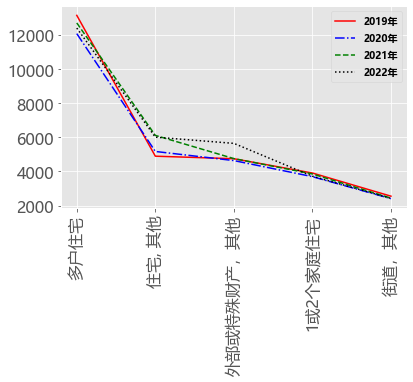

In [51]:
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
from pylab import xticks,yticks,np
import matplotlib
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False
x = data_pos.head(5).index.to_list()
y1 = data_pos.head(5)["2019年"]
y2 = data_pos.head(5)["2020年"]
y3 = data_pos.head(5)["2021年"]
y4 = data_pos.head(5)["2022年"]
plt.plot(x,y1,color = 'r',label="2019年")
plt.plot(x,y2,'-.', color = 'b',label="2020年")
plt.plot(x,y3,'--', color = 'g',label="2021年")
plt.plot(x,y4,':', color = 'black',label="2022年")
plt.xticks(fontsize=16, )  
plt.yticks(fontsize=16, ) 
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.15, right=0.95)
pl.xticks(rotation=90)
font = {'family': 'MicroSoft YaHei',
        'weight': 'bold',
        'size': 'larger'}
my_font = matplotlib.rc("font", family='MicroSoft YaHei', weight="bold")
plt.legend(prop=my_font)
plt.show()

从上图中发现2019-2022年最主要的火警类型为公共服务，在火灾报警次数的Top5中基本上都是和居民住宅区有关，说明最容易引起火灾的地方也在人群密度大的居民住宅区，并且每年的数量都相对稳定；

在这基础上，有关部门应该在居民住宅区及附近增加警力以及在在居民区可以多设置灭火装置，此外居民也应该加强防火意识和掌握基本的灭火技能。